In [1]:
import os
import pandas as pd
os.chdir("/home/adrianhurtado/testing/post_watoc/august")
from madnessReader import MadnessReader
from madnessReader import ExcitedData
from madnessReader import FrequencyData
from madnessReader import *
from daltonRunner import DaltonRunner
import matplotlib.pyplot as plt
import json


In [2]:
basis_list=['aug-cc-pVDZ','aug-cc-pVTZ','aug-cc-pVQZ','aug-cc-pV5Z','aug-cc-pV6Z']
d_basis_list=['d-aug-cc-pVDZ','d-aug-cc-pVTZ','d-aug-cc-pVQZ','d-aug-cc-pV5Z','d-aug-cc-pV6Z']
pc_basis_list=['aug-cc-pCVDZ','aug-cc-pCVTZ','aug-cc-pCVQZ']

In [3]:
all_mols=[]
for g in glob.glob('molecules/*.mol'):
    m = g.split('/')
    mol = m[1].split('.')[0]
    all_mols.append(mol)
print(all_mols)       
print(len(all_mols))     


['CSO', 'LiH', 'FCN', 'P2H4', 'OCl2', 'LiH_s', 'SH2', 'Li2', 'NaCl', 'C2H2', 'BH3', 'HCONH2', 'CH3SH', 'P2', 'BH2Cl', 'NaCN', 'HCN', 'CH3OH', 'HBS', 'C2H4', 'SO2', 'HNC', 'Na2', 'F2', 'N2', 'SiH4', 'N2H2', 'CH3NH2', 'NH3O', 'HOF', 'He', 'HF', 'OF2', 'ClF', 'HCOOH', 'NH3', 'CH3Cl', 'Mg2', 'N2H4', 'Ne', 'HCHO', 'SiH3Cl', 'SF2', 'SiH3F', 'HOCl', 'HOOH', 'H2', 'HCl', 'HCCF', 'Mg', 'CH2BH', 'CH3BH2', 'BF', 'SiO', 'FNO', 'H2O', 'S2H2', 'LiCl', 'PH3O', 'Ar', 'BHF2', 'HNS', 'O3', 'HBO', 'Cl2', 'C6H6', 'NH2Cl', 'LiCN', 'CO', 'CS', 'LiBH4', 'CH4', 'BeH2', 'BH2F', 'CH2NH', 'CH3F', 'CO2', 'PH3', 'ClCN', 'HCHS', 'NaLi', 'SCl2', 'Be', 'NH2OH', 'HCCCl', 'NaH', 'NH2F', 'HNO', 'HCP', 'NOCl']
90


In [4]:
def polar_data_summary(mol,xc,op,compare_basis):
    
    d=display_convergence_plots(mol,xc,op,True )
    d=frequency_norm_plots(mol,xc,op,True )
    data=FrequencyData(mol,xc,op)
    gd,rd,md,dd=data.compare_dalton(compare_basis)
    #display('madness',md.round(4))
    #display(compare_basis,rd.round(4))
    display('[madness]-['+compare_basis+']',dd.round(4))
    avg_error=dd.loc[:,['xx','yy','zz']].mean(1)
    display('error in avg polarizability compared to:'+compare_basis,avg_error)
    return avg_error
def compare_basis(mol,xc,op,basis_list):
    data=FrequencyData(mol,xc,op)
    #display('madness',md.round(4))
    #display(compare_basis,rd.round(4))
    b_error={}
    for basis in basis_list:
        gd,rd,md,dd=data.compare_dalton(basis)
        avg_error=dd.loc[:,['xx','yy','zz']].mean(1)
        b_error[basis]=avg_error
    return pd.DataFrame(b_error)

def report_converged(mol_list,num_converged):
    converged=[]
    not_converged=[]
    not_found=[]
    type_error=[]
    json_error=[]
    for mol in mol_list:
        try:
            ben=FrequencyData(mol,'hf','dipole')
            if ben.converged.all() and ben.converged.sum()==num_converged:
                converged.append(mol)
            else:
                not_converged.append(mol)
        except FileNotFoundError as f:
            not_found.append(mol)
        except TypeError as f:
            type_error.append(mol)
        except json.decoder.JSONDecodeError as j:
            json_error.append(mol)
            
    num_c=len(converged)
    num_n=len(not_converged)
    num_nf=len(not_found)
    num_json_e=len(json_error)
    num_type_e=len(type_error)

    total=num_c+num_n+num_nf+num_json_e+num_type_e
    
    non_converged=[]
    part_converged=[]
    if True:
        for mol in not_converged:
            check=FrequencyData(mol,'hf','dipole')
            if(check.converged.any()):
                #print(mol,'\n',check.converged)
                part_converged.append(mol)
            else:
                non_converged.append(mol)
    num_not_converged=len(non_converged)
    num_part_converged=len(part_converged)
    
    print("converged : ",num_c)
    print("not converged : ",num_n)
    print("not found : ",num_nf)
    print("json error : ",num_json_e)
    print("type error : ",num_type_e)
    print("total : ",total)
    print("fully not converged",num_not_converged)
    print("num partly fully converged",num_part_converged )
    return converged,part_converged,non_converged,not_found,type_error,json_error

In [16]:
converged,part_converged,not_converged,not_found,type_error,json_error=report_converged(all_mols,9)

0.03950625  not found: [Errno 2] No such file or directory: '/home/adrianhurtado/testing/post_watoc/august/hf/CSO/dipole_hf_0-039506/response_base.json'
0.045491625  not found: [Errno 2] No such file or directory: '/home/adrianhurtado/testing/post_watoc/august/hf/P2H4/dipole_hf_0-045492/response_base.json'
0.017739125  not found: [Errno 2] No such file or directory: '/home/adrianhurtado/testing/post_watoc/august/hf/OCl2/dipole_hf_0-017739/response_base.json'
0.0144125625  not found: [Errno 2] No such file or directory: '/home/adrianhurtado/testing/post_watoc/august/hf/SH2/dipole_hf_0-014413/response_base.json'
0.06138375  not found: [Errno 2] No such file or directory: '/home/adrianhurtado/testing/post_watoc/august/hf/NaCl/dipole_hf_0-061384/response_base.json'
0.041151  not found: [Errno 2] No such file or directory: '/home/adrianhurtado/testing/post_watoc/august/hf/C2H2/dipole_hf_0-041151/response_base.json'
0.102867625  not found: [Errno 2] No such file or directory: '/home/adrianhu

/home/adrianhurtado/testing/madness-test-suite/madness-test-suite/madnessReader.py:382: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.Series(converged),


0.0962655  not found: [Errno 2] No such file or directory: '/home/adrianhurtado/testing/post_watoc/august/hf/HBS/dipole_hf_0-096266/response_base.json'
0.030095999999999998  not found: [Errno 2] No such file or directory: '/home/adrianhurtado/testing/post_watoc/august/hf/SO2/dipole_hf_0-030096/response_base.json'
0.03628825  not found: [Errno 2] No such file or directory: '/home/adrianhurtado/testing/post_watoc/august/hf/HNC/dipole_hf_0-036288/response_base.json'
0.0182145  not found: [Errno 2] No such file or directory: '/home/adrianhurtado/testing/post_watoc/august/hf/Na2/dipole_hf_0-018215/response_base.json'
0.01502225  not found: [Errno 2] No such file or directory: '/home/adrianhurtado/testing/post_watoc/august/hf/NH3O/dipole_hf_0-015022/response_base.json'
0.04857625  not found: [Errno 2] No such file or directory: '/home/adrianhurtado/testing/post_watoc/august/hf/OF2/dipole_hf_0-048576/response_base.json'
0.0421985  not found: [Errno 2] No such file or directory: '/home/adrianh

/home/adrianhurtado/testing/madness-test-suite/madness-test-suite/madnessReader.py:382: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.Series(converged),


0.0  not found: [Errno 2] No such file or directory: '/home/adrianhurtado/testing/post_watoc/august/hf/HCCF/dipole_hf_0-000000/response_base.json'


/home/adrianhurtado/testing/madness-test-suite/madness-test-suite/madnessReader.py:382: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.Series(converged),


0.01325025  not found: [Errno 2] No such file or directory: '/home/adrianhurtado/testing/post_watoc/august/hf/SiO/dipole_hf_0-013250/response_base.json'
0.046338437499999996  not found: [Errno 2] No such file or directory: '/home/adrianhurtado/testing/post_watoc/august/hf/FNO/dipole_hf_0-046338/response_base.json'
0.02490275  not found: [Errno 2] No such file or directory: '/home/adrianhurtado/testing/post_watoc/august/hf/S2H2/dipole_hf_0-024903/response_base.json'
0.1095565  not found: [Errno 2] No such file or directory: '/home/adrianhurtado/testing/post_watoc/august/hf/LiCl/dipole_hf_0-109557/response_base.json'
0.03521  not found: [Errno 2] No such file or directory: '/home/adrianhurtado/testing/post_watoc/august/hf/PH3O/dipole_hf_0-035210/response_base.json'
0.00378025  not found: [Errno 2] No such file or directory: '/home/adrianhurtado/testing/post_watoc/august/hf/HNS/dipole_hf_0-003780/response_base.json'
0.03887225  not found: [Errno 2] No such file or directory: '/home/adrian

/home/adrianhurtado/testing/madness-test-suite/madness-test-suite/madnessReader.py:382: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.Series(converged),


0.030469125  not found: [Errno 2] No such file or directory: '/home/adrianhurtado/testing/post_watoc/august/hf/ClCN/dipole_hf_0-030469/response_base.json'
0.0  not found: [Errno 2] No such file or directory: '/home/adrianhurtado/testing/post_watoc/august/hf/HCHS/dipole_hf_0-000000/response_base.json'
0.0  not found: [Errno 2] No such file or directory: '/home/adrianhurtado/testing/post_watoc/august/hf/SCl2/dipole_hf_0-000000/response_base.json'


/home/adrianhurtado/testing/madness-test-suite/madness-test-suite/madnessReader.py:382: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.Series(converged),
/home/adrianhurtado/testing/madness-test-suite/madness-test-suite/madnessReader.py:382: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.Series(converged),


0.05490225  not found: [Errno 2] No such file or directory: '/home/adrianhurtado/testing/post_watoc/august/hf/HCCCl/dipole_hf_0-054902/response_base.json'
0.0268445625  not found: [Errno 2] No such file or directory: '/home/adrianhurtado/testing/post_watoc/august/hf/NaH/dipole_hf_0-026845/response_base.json'
0.057665125000000005  not found: [Errno 2] No such file or directory: '/home/adrianhurtado/testing/post_watoc/august/hf/HCP/dipole_hf_0-057665/response_base.json'
0.0317228125  not found: [Errno 2] No such file or directory: '/home/adrianhurtado/testing/post_watoc/august/hf/NOCl/dipole_hf_0-031723/response_base.json'
0.03950625  not found: [Errno 2] No such file or directory: '/home/adrianhurtado/testing/post_watoc/august/hf/CSO/dipole_hf_0-039506/response_base.json'
0.045491625  not found: [Errno 2] No such file or directory: '/home/adrianhurtado/testing/post_watoc/august/hf/P2H4/dipole_hf_0-045492/response_base.json'
0.017739125  not found: [Errno 2] No such file or directory: '/

Total HF Energy  a(0.000)  a(0.046)  a(0.092)  a(0.138)  \
aug-cc-pVDZ                 -128.4963    1.8319    1.8346    1.8427    1.8565   
aug-cc-pVTZ                 -128.5333    2.1939    2.1974    2.2078    2.2255   
aug-cc-pVQZ                 -128.5438    2.3290    2.3330    2.3451    2.3657   
aug-cc-pV5Z                 -128.5468    2.3631    2.3674    2.3804    2.4025   
aug-cc-pV6Z                 -128.5471    2.3698    2.3741    2.3874    2.4100   
MRA                         -128.5471    2.3767    2.3811    2.3948    2.4180   
MRA density residual              NaN    0.0000    0.0000    0.0000    0.0000   

                      a(0.184)  a(0.231)  a(0.277)  a(0.323)  a(0.369)  
aug-cc-pVDZ             1.8765    1.9037    1.9393    1.9852    2.0442  
aug-cc-pVTZ             2.2512    2.2859    2.3312    2.3893    2.4638  
aug-cc-pVQZ             2.3956    2.4359    2.4885    2.5560    2.6423  
aug-cc-pV5Z             2.4347    2.4781    2.5348    2.6077    2.7013  
aug-cc-pV6Z             2.4429    2.4874    2.5455    2.6204    2.7169  
MRA                     2.4518    2.4977    2.5579    2.6357    2.7364  
MRA density residual    0.0000    0.0000    0.0000    0.0000    0.0001

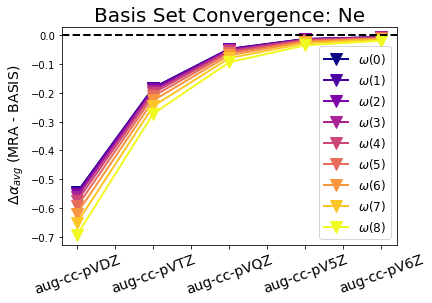

In [6]:
create_polar_diff_plot('Ne',basis_list)

In [9]:
data=FrequencyData('Be','hf','dipole')
data.calc_info['calcinfo_nmo']


4

In [56]:


def get_walltime_data(mol,xc,operator):
    
    data=FrequencyData(mol,'hf','dipole')
    n_mo=data.calc_info['calcinfo_nalpha']
    g_time=data.calc_info['wall_time']
    wall_times=[]
    frequencies=[]
    for freq,base in data.response_base.items():
        frequencies.append(freq)
        wall_times.append(base['wall_time'])
        
    wall_array=np.array(wall_times)
    total_time=wall_array.sum()
    total_time+=g_time
    print(n_mo,' electrons, walltime: ',total_time)
    return n_mo, total_time

def get_wall_time_series(molecules,xc,operator):
    
    wall_time_data={}
    molecule_data={}
    for mol in molecules:
        n,time=get_walltime_data(mol,xc,operator)
        nkey=(n)
        if nkey not in wall_time_data:
            wall_time_data[nkey]=[]
            wall_time_data[nkey].append(time)
        else:
            wall_time_data[nkey].append(time)
        if nkey not in molecule_data:
            molecule_data[nkey]=[]
            molecule_data[nkey].append(mol)
        else:
            molecule_data[nkey].append(mol)
    wall_time_avg_data={}
    for n,time_list in wall_time_data.items():
        time_array=np.array(time_list)
        time_avg=time_array.sum()
        wall_time_avg_data[n]=time_avg
    time_series=pd.Series(wall_time_avg_data)
    mol_data=pd.Series(molecule_data)
    
    return time_series,mol_data.sort_index()
tseries,mol_data=get_wall_time_series(converged,'hf','dipole')   

2  electrons, walltime:  19146.501478910446
11  electrons, walltime:  588868.2531321049
2  electrons, walltime:  23805.514810085297
3  electrons, walltime:  72925.82353210449
4  electrons, walltime:  48567.65501451492
7  electrons, walltime:  368175.6033182144
9  electrons, walltime:  580390.0664346218
8  electrons, walltime:  369893.24310970306
9  electrons, walltime:  672059.4769291878
7  electrons, walltime:  160527.2929971218
9  electrons, walltime:  537090.0200417042
8  electrons, walltime:  373729.56258678436
9  electrons, walltime:  618921.116143465
9  electrons, walltime:  738340.5089304447
1  electrons, walltime:  3509.779153108597
5  electrons, walltime:  175161.89459562302
9  electrons, walltime:  315040.42212820053
5  electrons, walltime:  46405.68997645378
8  electrons, walltime:  470249.97832894325
1  electrons, walltime:  16836.095591783524
9  electrons, walltime:  766002.6807351112
6  electrons, walltime:  243554.4293732643
7  electrons, walltime:  240075.07122278214
8 

In [57]:
mol_data.sort_index()
    
    
    
    
    

1                                              [He, H2]
2                                      [LiH, LiH_s, Be]
3                                           [Li2, BeH2]
4                                                 [BH3]
5                                    [HF, Ne, H2O, CH4]
6                                           [Mg, LiBH4]
7                   [HCN, N2, CH2BH, BF, HBO, CO, NaLi]
8     [C2H4, N2H2, HCHO, CH3BH2, LiCN, BH2F, CH2NH, ...
9     [CH3OH, F2, SiH4, CH3NH2, HOF, N2H4, HCl, Ar, ...
11                                       [FCN, CS, CO2]
12                                           [BHF2, O3]
dtype: object

Total HF Energy  a(0.000)  a(0.011)  a(0.022)  a(0.034)  \
d-aug-cc-pVDZ               -435.3342   28.0446   28.0633   28.1197   28.2144   
d-aug-cc-pVTZ               -435.3538   28.2311   28.2504   28.3084   28.4061   
d-aug-cc-pVQZ               -435.3599   28.2549   28.2743   28.3328   28.4311   
MRA                         -435.3624   28.2875   28.3069   28.3658   28.4648   
MRA density residual              NaN    0.0000    0.0001    0.0000    0.0000   

                      a(0.045)  a(0.056)  a(0.067)  a(0.078)  a(0.090)  
d-aug-cc-pVDZ          28.3488   28.5246   28.7446   29.0121   29.3320  
d-aug-cc-pVTZ          28.5447   28.7260   28.9530   29.2292   29.5597  
d-aug-cc-pVQZ          28.5706   28.7532   28.9818   29.2600   29.5929  
MRA                    28.6052   28.7890   29.0191   29.2984   29.6344  
MRA density residual    0.0000    0.0000    0.0000    0.0001    0.0000

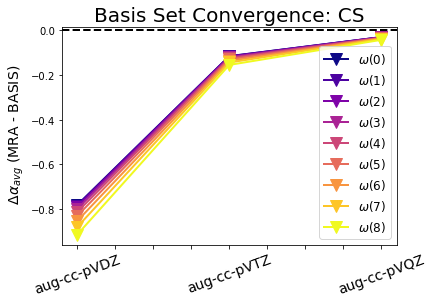

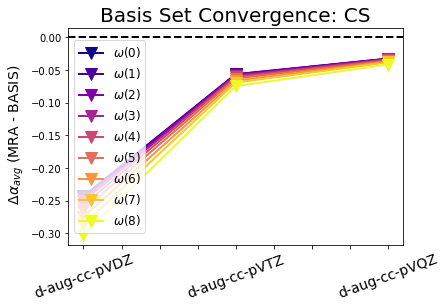

In [58]:
mol='CS'
create_polar_diff_plot(mol,basis_list[0:3])
create_polar_diff_plot(mol,d_basis_list[0:3])

In [59]:
# comparing basis
def create_basis_mol_data(basis_list,mol_list,data_dict):
    b_data={}
    for b in basis_list:
        diff_dict={}
        for mol in mol_list:
            diff_m=data_dict[mol]-data_dict[mol].loc['MRA']
            diff_dict[mol]=diff_m.loc[b]
            diff_dict[mol].index=['Total HF Energy',r'$\alpha(\omega_0)$',r'$\alpha(\omega_1)$',r'$\alpha(\omega_2)$',r'$\alpha(\omega_3)$',r'$\alpha(\omega_4)$',]
        pdm=pd.DataFrame(diff_dict)
        pdm.name=b
        b_data[b]=pdm.T
    return b_data

def mean_and_std(basis_list,mol_list,data_dict):
    b_data=create_basis_mol_data(basis_list,mol_list,data_dict)
    mean_d={}
    std_d={}
    for b in basis_list:
        mean_d[b]=b_data[b].mean()
        std_d[b]=b_data[b].std()
    p_mean=pd.DataFrame(mean_d)
    p_std=pd.DataFrame(std_d)
    return p_mean,p_std
    

/home/adrianhurtado/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


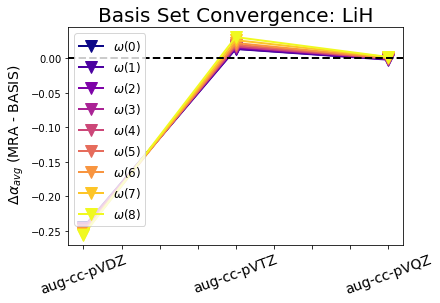

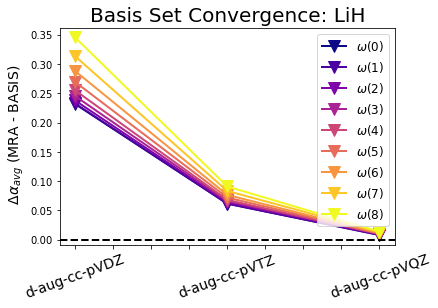

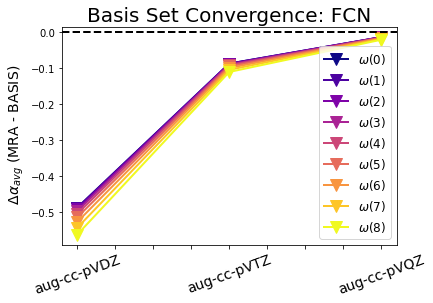

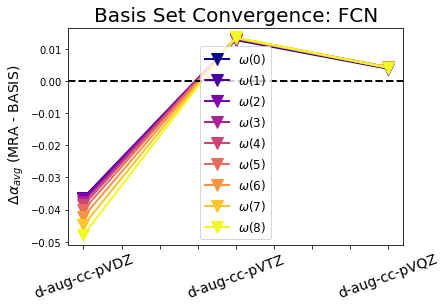

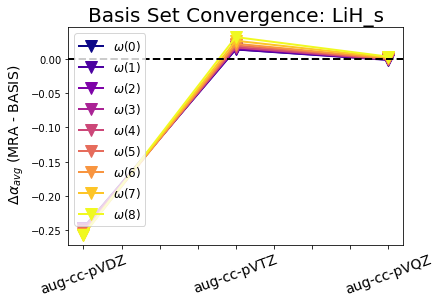

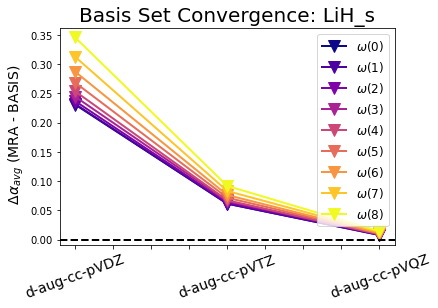

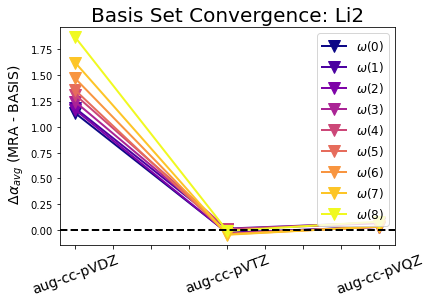

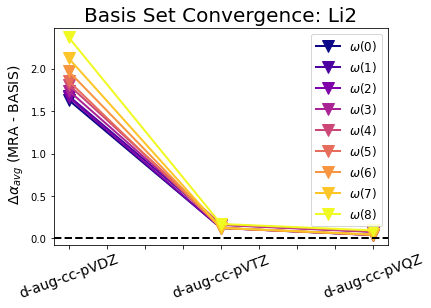

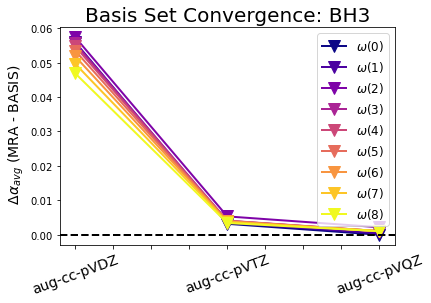

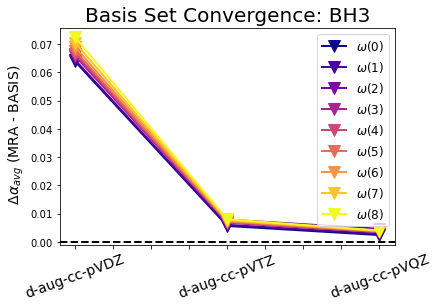

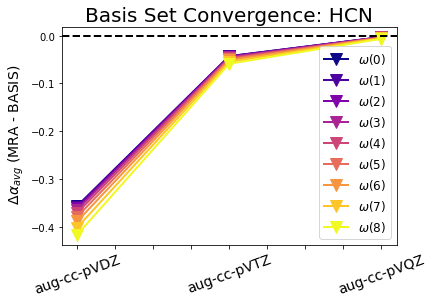

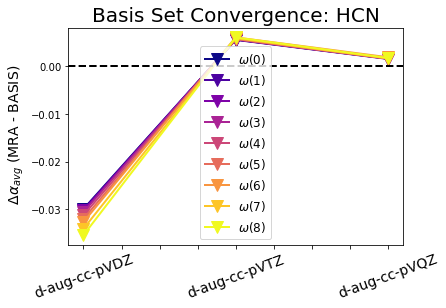

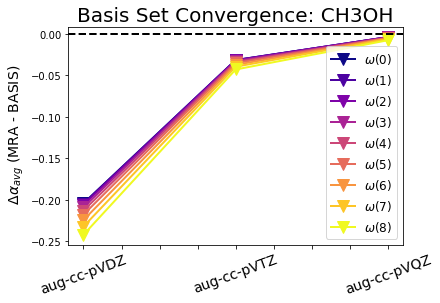

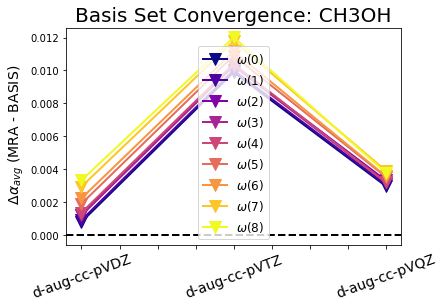

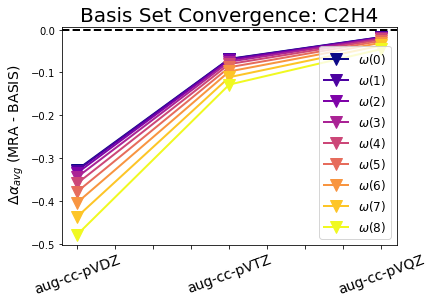

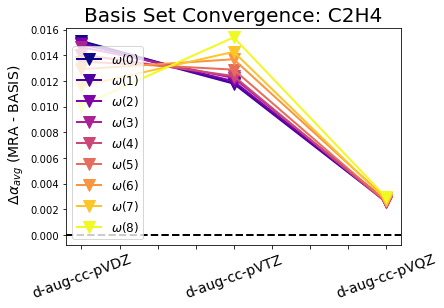

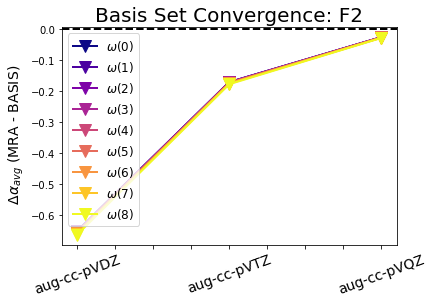

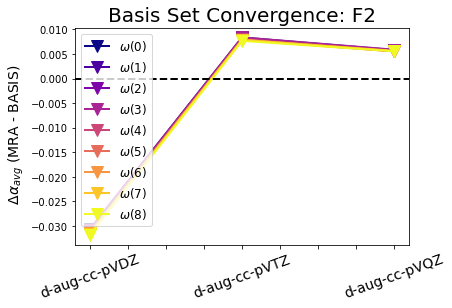

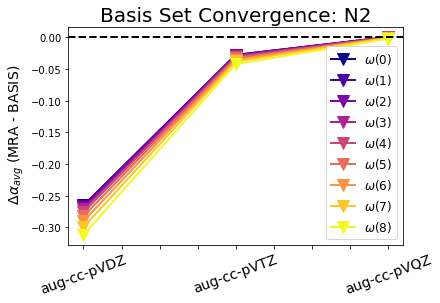

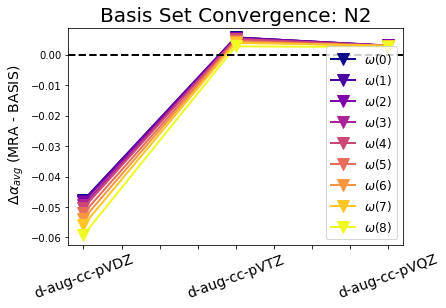

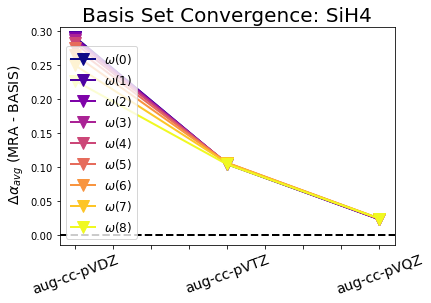

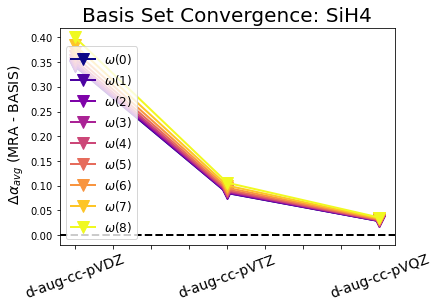

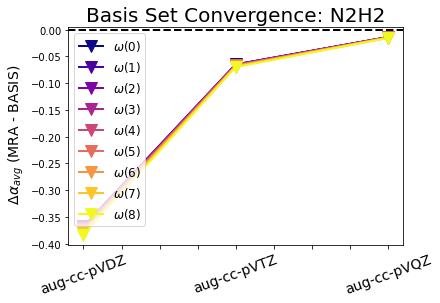

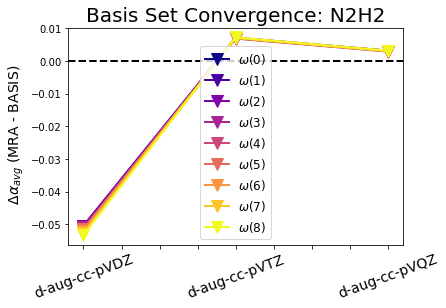

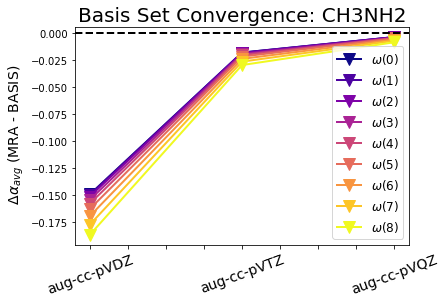

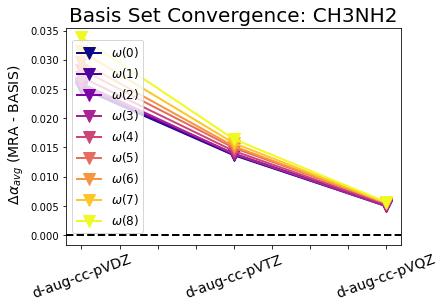

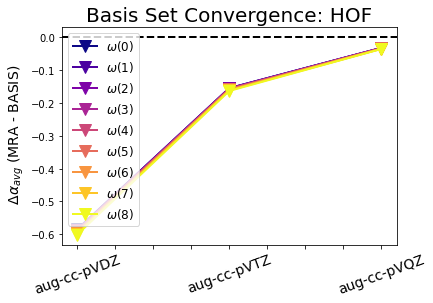

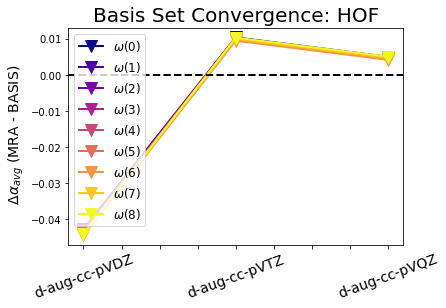

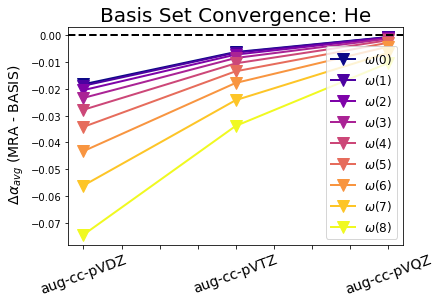

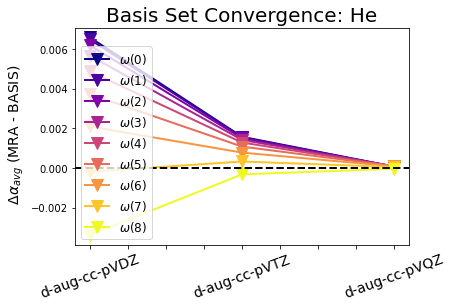

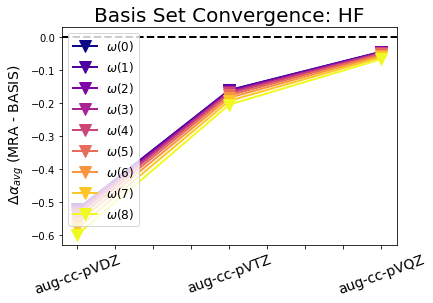

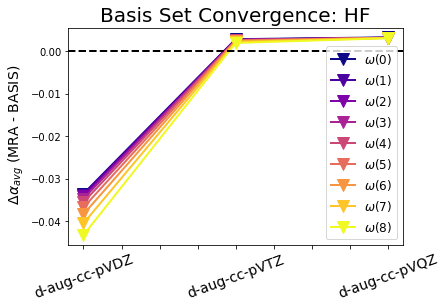

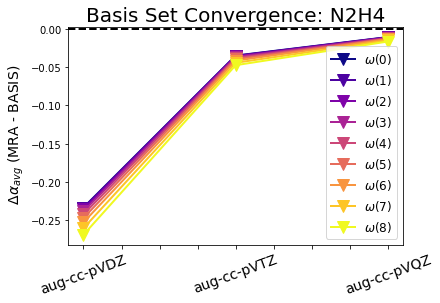

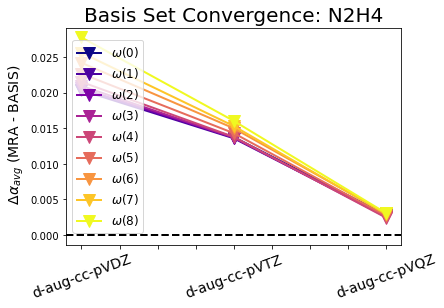

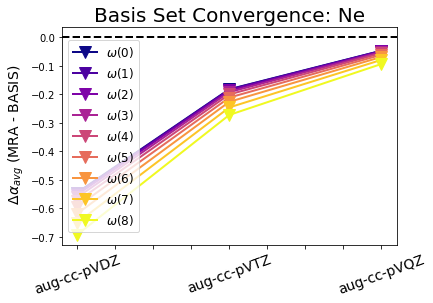

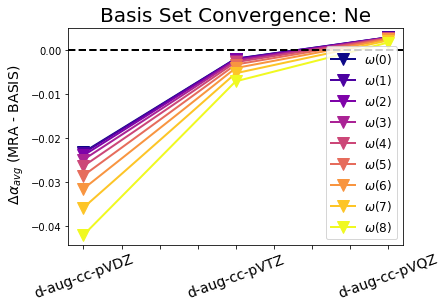

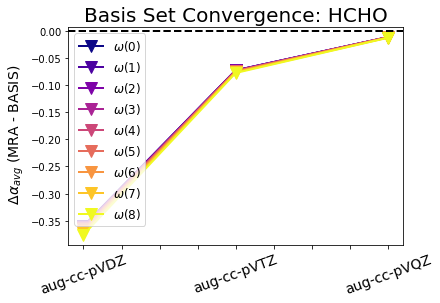

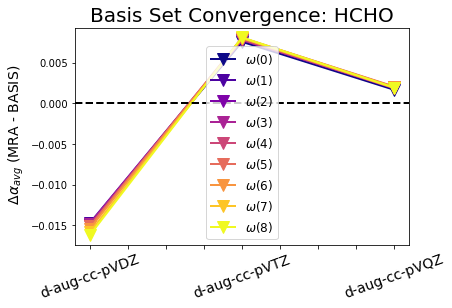

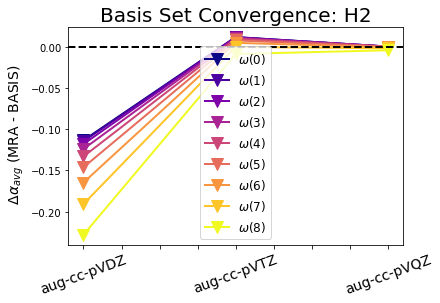

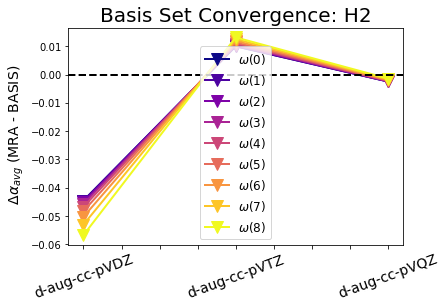

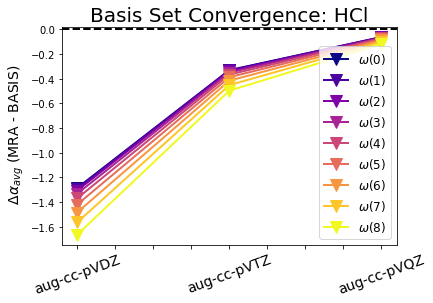

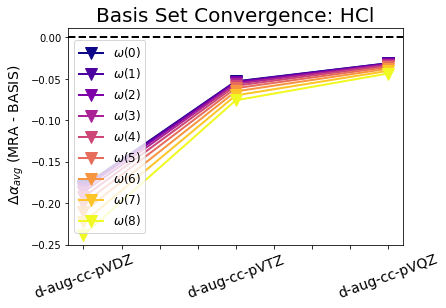

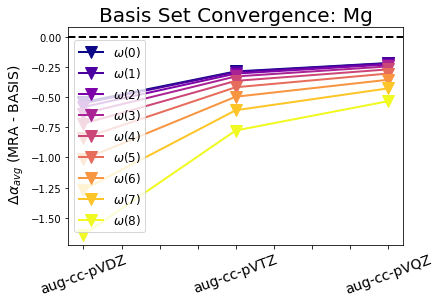

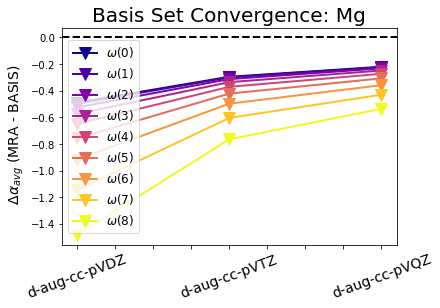

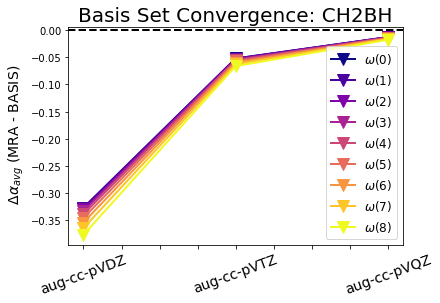

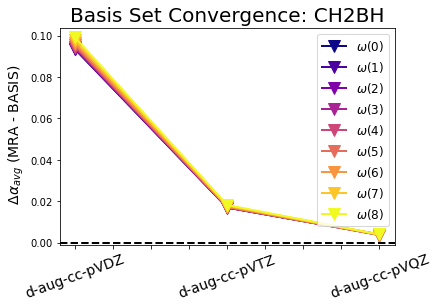

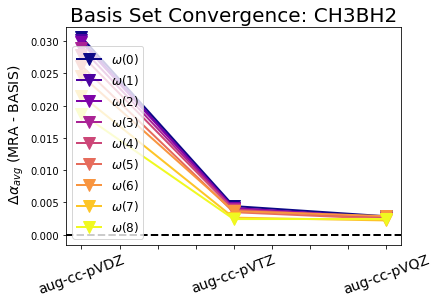

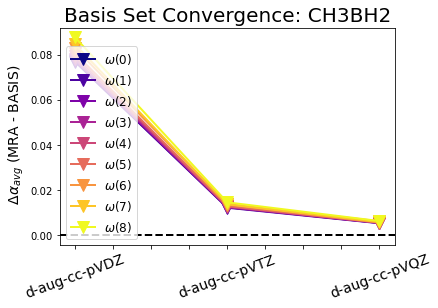

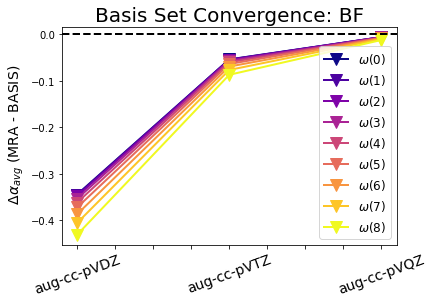

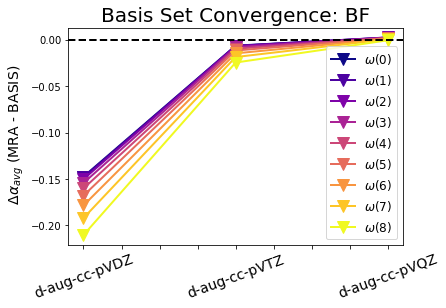

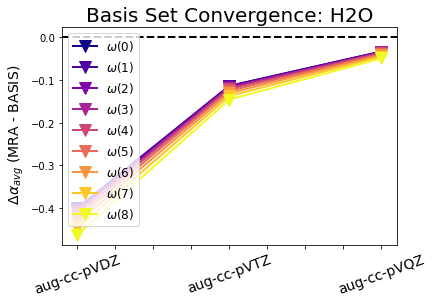

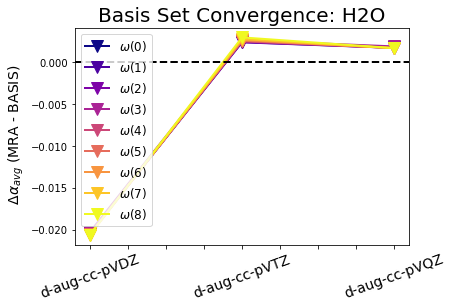

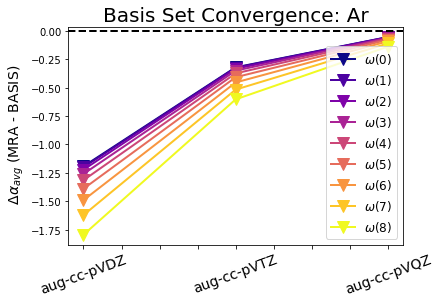

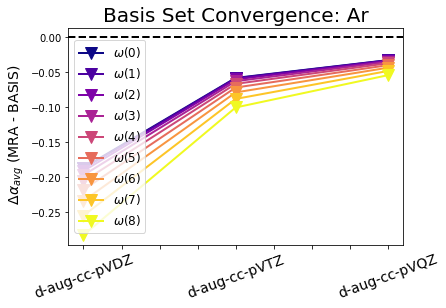

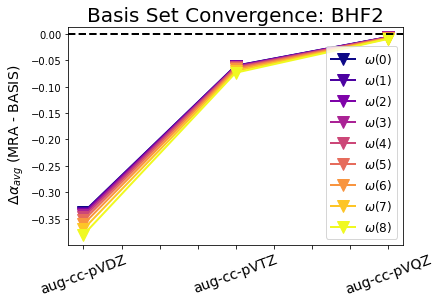

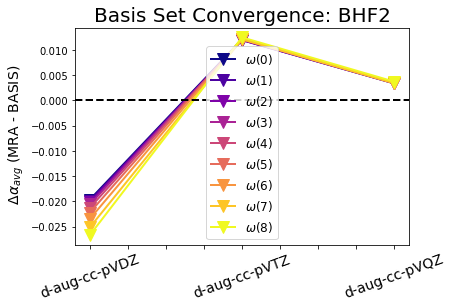

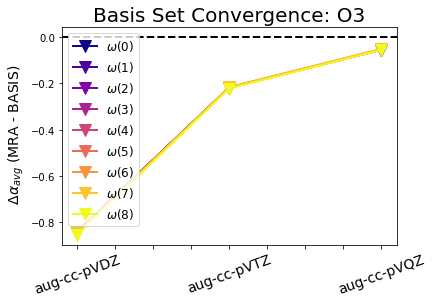

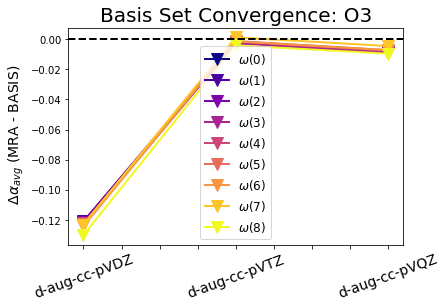

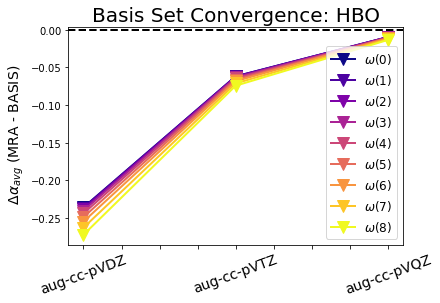

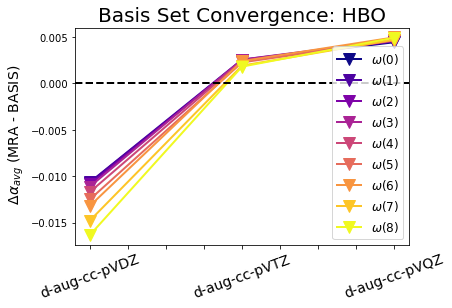

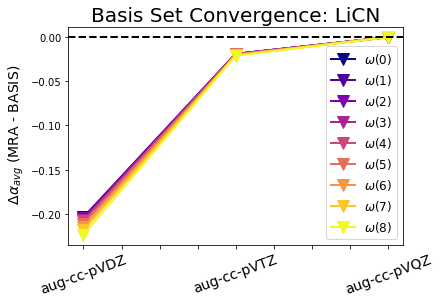

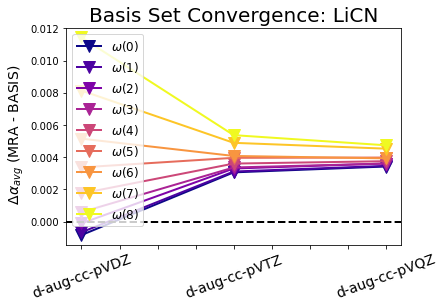

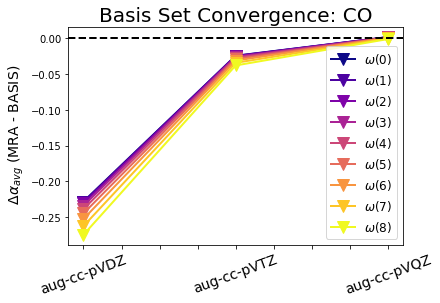

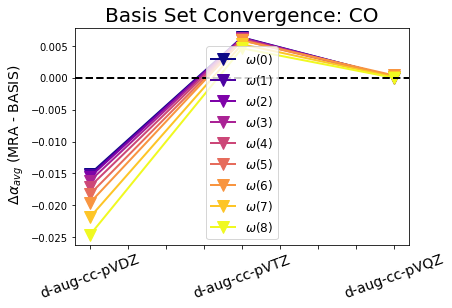

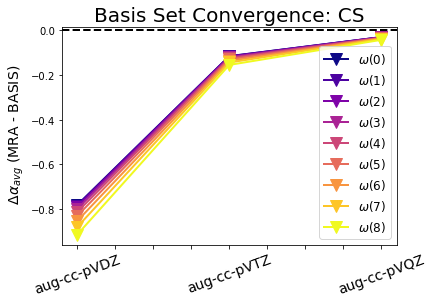

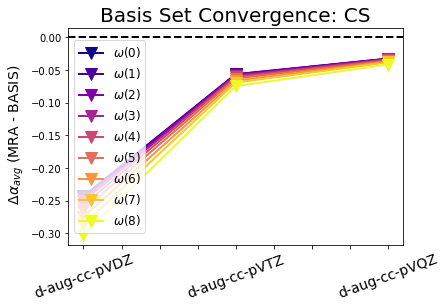

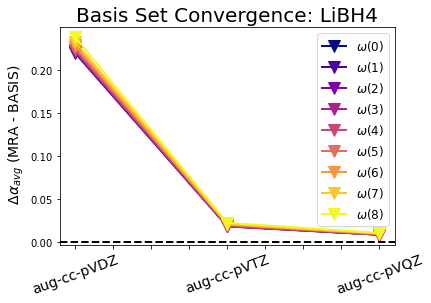

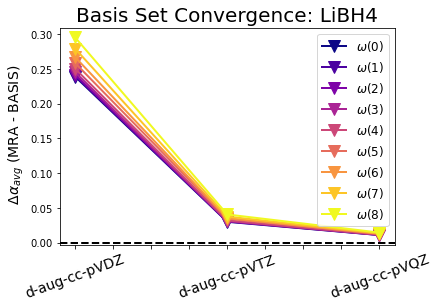

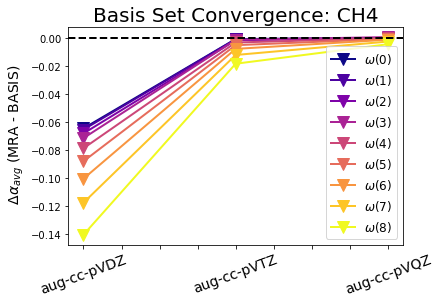

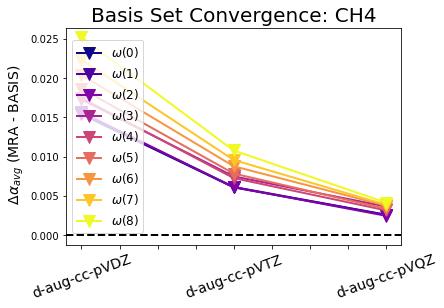

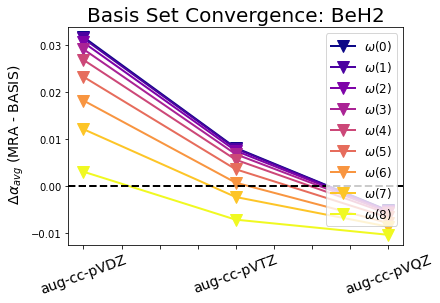

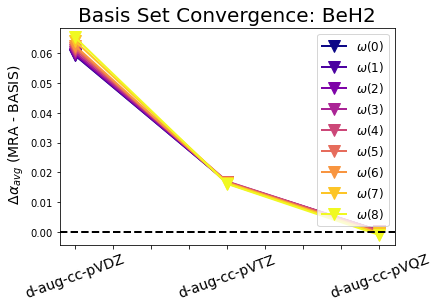

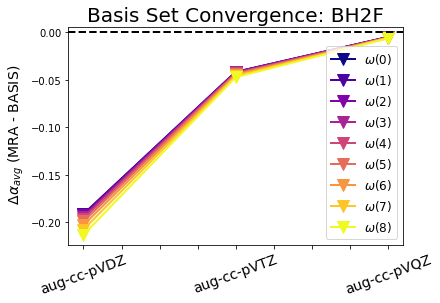

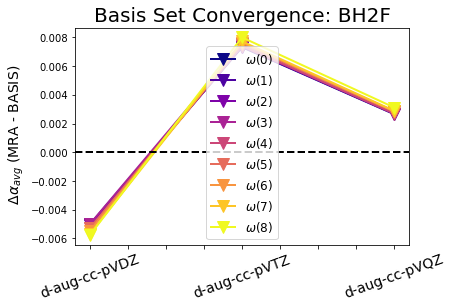

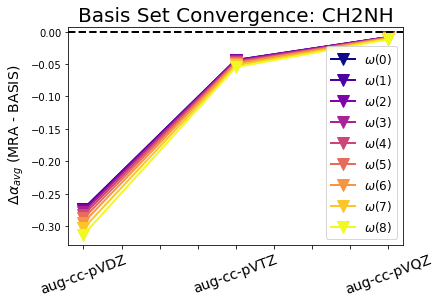

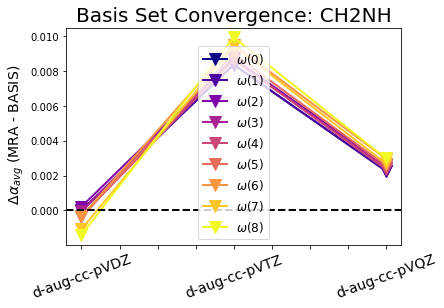

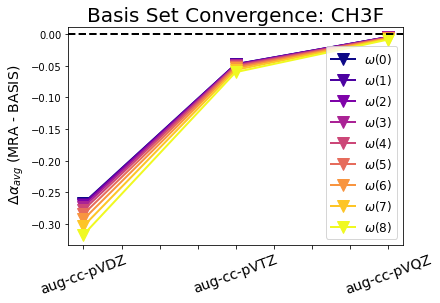

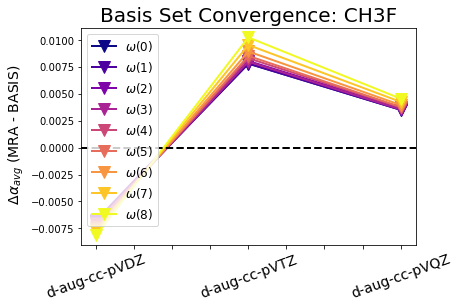

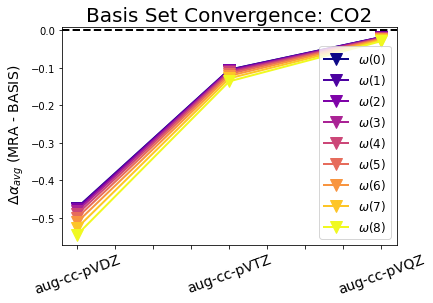

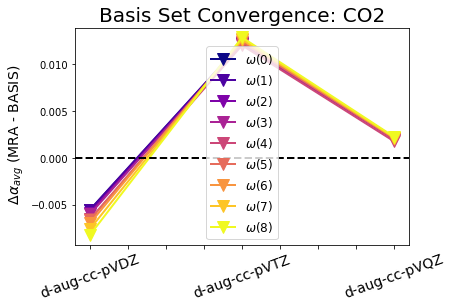

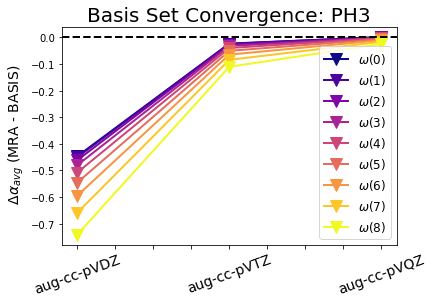

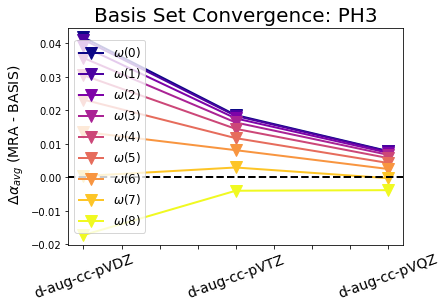

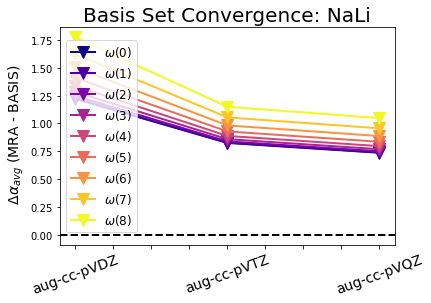

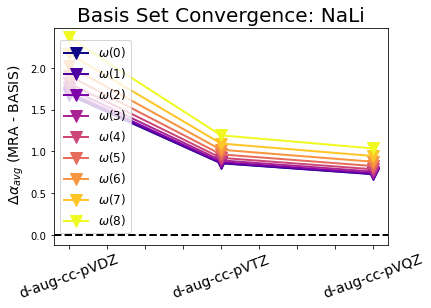

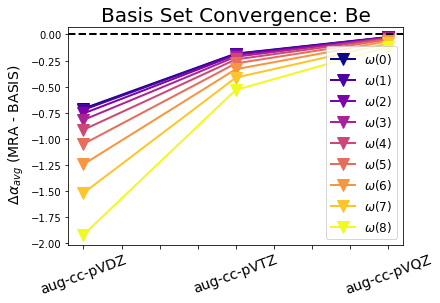

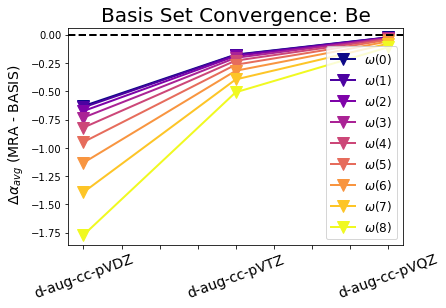

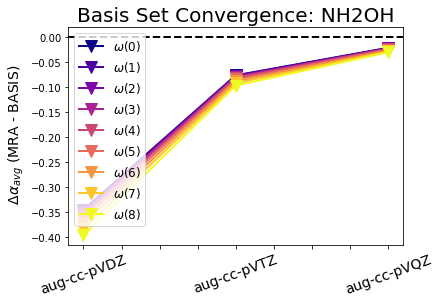

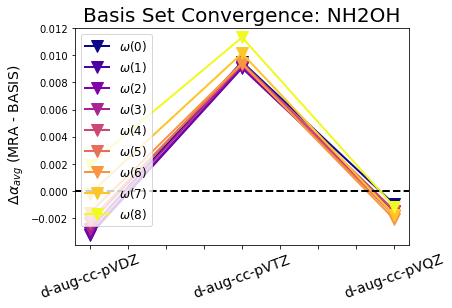

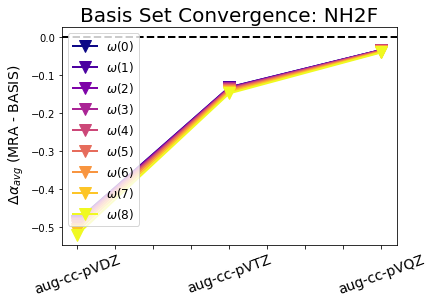

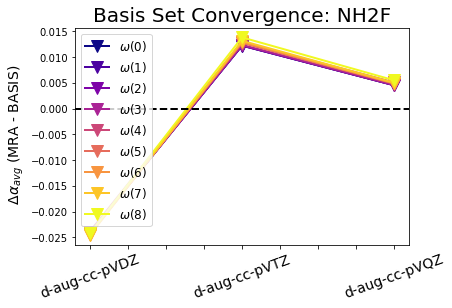

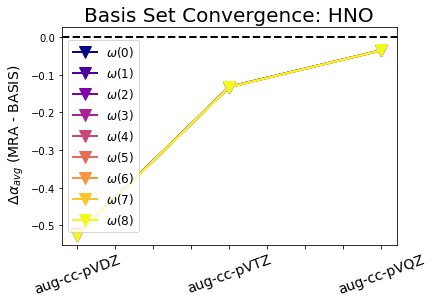

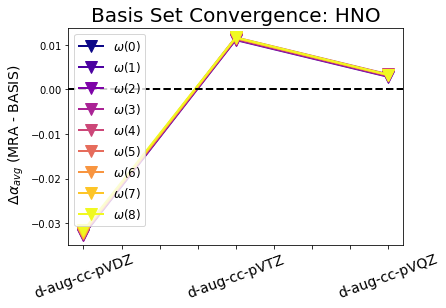

In [60]:
mol_list=converged[:]

blist=basis_list[0:3]
dlist=d_basis_list[0:3]

data_dict_aug={}
data_dict_daug={}

for mol in mol_list:
   
    data_dict_aug[mol]=create_polar_diff_plot(mol,blist)
    data_dict_daug[mol]=create_polar_diff_plot(mol,dlist)